In [115]:
from __future__ import division
import pandas as pd
import numpy as np 
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import scale

from code.organize import *
from code.roughEDA import *
from code.survey_processor_full import *
from code.model_vis import *
from code.fc import *
from code.fc_cluster import *
from code.clusterEDA import *


import plotly.plotly as py
from plotly.tools import FigureFactory as FF
import plotly.graph_objs as go

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In this file, I will wrapp up the clusions from step7_cluster_study and more concise graphs. 

In [3]:
df = pd.read_pickle('data/df_id.pkl')       # Load survey data with cluster_id
fc = FeatureContribution('data/fc_df2.pkl')  # Load feature contribution data
fc_df = fc.cluster_processor(3,6)            # generate cluster

# Cluster 1

Main contributors
* agekdbrn: historgram and median. Median is easier to interpret and I will use to for presentation slide.

In [14]:
c1 =df[df.cluster==1]

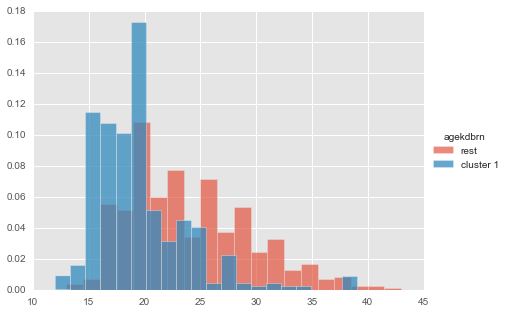

In [12]:
plt.figure(figsize=(7,5))
one_res_hist_mat(df,1,'agekdbrn')

In [15]:
c1.agekdbrn.median()

19.0

* degree: Respondents' degree in this cluster is very speciall. All less than high school. So I can just write a sentence or use an icon to summerize it. 

* dwelling, class_ and incom16

In [117]:
all_try = subset_all(df,1,['dwelling','class_','incom16'],[['Row house','Trailer'],['Lower class'],
                                                 ['Far below average','Below average']])

In [120]:
trace0 = go.Bar(
    x = all_try.columns,
    y = all_try.iloc[0,:].values,
    name = 'rest',
    marker = dict(
        color = 'rgb(10, 97, 142)'#, 'rgb(10, 97, 142)', 'rgb(6, 80, 177)','rgb(7, 87, 197)','rgb(7, 87, 197)']
    )
)
trace1 = go.Bar(
    x = all_try.columns,
    y = all_try.iloc[1,:].values,
    name = 'cluster1',
    marker = dict(
        color = 'rgb(245, 111, 136)'#,'rgb(245, 111, 136)','rgb(248, 32, 113)','rgb(248, 80, 58)', 'rgb(248, 80, 58)']
    )
)
data = [trace0,trace1]

    
fig = go.Figure(data=data)
py.iplot(fig, filename = "cluster1")